In [1]:
import nease
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

### VastDB pre-processing

In [2]:
data_folder='AS data/VastDB/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)
len(events)

68982

In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
events= events  [ (events['LENGTH']>=3)  &  (events['COMPLEX'].isin(['S*','S'])) ]
len(events)

20300

In [6]:
# extract the events in the following tissues
tissue={}

#muscles
tissue['Muscles']=['Heart_c' ,'Heart_a' ,'Heart_b','Muscle_b','Muscle_e']

#Embryonic Brain
#tissue['Embryonic']=['Embr_Forebrain_St13_14']

#Neural
tissue['Neural']=['Whole_Brain_b','Cortex','Retina_peripheral']


#Placental
tissue['Placental']=['Placenta_a' , 'Placenta_b' , 'Placenta_c' ]

# Epithelial
tissue['Epithelial']= [ 'Skin' , 'Placenta_Epith' , 'EpithelialCells'] 


# Digestive Tract
tissue['Digestive']= [ 'Colon_b' ,'Stomach_a','Stomach_b'  ]

# Liver
tissue['liver']= ['Liver_a' , 'Liver_b' ,'Liver_c' ]

# Kidney
tissue['Kidney']=['Kidney_c','Kidney_b']

# Adipose
tissue['Adipose']= [ 'Adipose_b' , 'Adipose_c' , 'Adipose_d']


# Testis
tissue['Testis']=[ 'Testis_a', 'Testis_c']



#Immune-Hematopoietic
tissue['Immune-Hematopoietic']=['Bone_marrow_a', 'Bone_marrow_b','Lymph_node_c']

#Ovary
tissue['Ovary']=['Ovary_a','Ovary_b']


In [7]:
tissues=[]
for x in list(tissue.values()):
    tissues=tissues+x

In [8]:

events=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]

In [9]:
events

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Whole_Brain_b,Cortex,Retina_peripheral,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b,Heart_c-Q,Heart_a-Q,Heart_b-Q,Muscle_b-Q,Muscle_e-Q,Whole_Brain_b-Q,Cortex-Q,Retina_peripheral-Q,Placenta_a-Q,Placenta_b-Q,Placenta_c-Q,Skin-Q,Placenta_Epith-Q,EpithelialCells-Q,Colon_b-Q,Stomach_a-Q,Stomach_b-Q,Liver_a-Q,Liver_b-Q,Liver_c-Q,Kidney_c-Q,Kidney_b-Q,Adipose_b-Q,Adipose_c-Q,Adipose_d-Q,Testis_a-Q,Testis_c-Q,Bone_marrow_a-Q,Bone_marrow_b-Q,Lymph_node_c-Q,Ovary_a-Q,Ovary_b-Q
14382,HsaEX0000001,88.24,NaN,60.00,100.00,NaN,60.00,62.96,50.00,75.00,NaN,100.00,NaN,NaN,NaN,33.33,NaN,100.00,NaN,50.00,100.00,88.89,60.00,NaN,100.00,20.00,100.00,72.41,100.00,100.00,71.43,100.00,69.23,"N,N,N,B1,S@14.12,1.88","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.40,1.60","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@7.20,4.80","N,N,N,B1,S@13.85,8.15","N,N,N,B1,S@6.00,6.00","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@1.50,1.50","N,N,N,Bn,S@2.00,0.00","VLOW,VLOW,VLOW,B1,S@30.22,3.78","N,N,N,B1,S@7.20,4.80","N,N,N,Bn,S@0,0","N,N,N,Bn,S@8.00,0.00","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@2.00,0.00","N,N,N,B2,S@18.10,6.90","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@4.29,1.71","N,N,N,Bn,S@2.00,0.00","N,N,N,OK,S@7.62,3.38"
14383,HsaEX0000002,100.00,NaN,NaN,NaN,100.00,100.00,NaN,100.00,100.00,100.00,100.00,100.00,100.00,NaN,NaN,NaN,100.00,NaN,NaN,100.00,100.00,100.00,100.00,100.00,NaN,100.00,100.00,NaN,NaN,100.00,NaN,NaN,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,B1,S@7.00,0.00","N,N,N,Bn,S@0,0","N,N,N,OK,S@12.00,0.00","VLOW,VLOW,VLOW,B1,S@31.00,0.00","N,N,N,Bn,S@8.00,0.00","N,N,N,B1,S@22.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@5.00,0.00","N,N,N,OK,S@3.00,0.00","N,N,N,B1,S@4.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0"
14384,HsaEX0000003,70.15,100.00,81.82,100.00,100.00,100.00,71.43,55.56,35.48,NaN,100.00,100.00,NaN,NaN,NaN,NaN,28.57,NaN,100.00,60.00,74.36,33.33,73.33,82.46,64.00,45.45,40.00,NaN,35.00,69.70,50.00,100.00,"VLOW,VLOW,VLOW,B2,S@39.99,17.01","N,N,N,Bn,S@7.00,0.00","N,N,N,Bn,S@8.18,1.82","N,N,N,Bn,S@11.00,0.00","N,N,N,Bn,S@4.00,0.00","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@4.29,1.71","N,N,N,Bn,S@3.89,3.11","VLOW,VLOW,VLOW,B2,S@7.45,13.55","N,N,N,Bn,S@0,0","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.57,6.43","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.40,1.60","N,N,N,B2,S@25.28,8.72","N,N,N,Bn,S@2.00,4.00","N,N,N,B2,S@19.07,6.93","VLOW,VLOW,VLOW,B2,S@85.76,18.24","N,N,N,B2,S@26.24,14.76","N,N,N,Bn,S@7.27,8.73","N,N,N,Bn,S@2.80,4.20","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,Bn,S@9.45,17.55","N,N,N,B2,S@19.52,8.48","N,N,N,Bn,S@1.50,1.50","N,N,N,Bn,S@3.00,0.00"
14385,HsaEX0000004,NaN,NaN,NaN,NaN,NaN,20.00,42.86,NaN,75.00,NaN,100.00,NaN,100.00,NaN,64.95,81.03,76.00,91.67,82.46,91.67,91.55,51.82,33.33,NaN,100.00,NaN,NaN,NaN,100.00,100.00,100.00,60.00,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@8.57,11.43","N,N,N,Bn,S@0,0","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@9.00,0.00","N,N,N,Bn,S@0,0","SOK,SOK,SOK,OK,S@103.92,56.08","VLOW,VLOW,VLOW,B2,S@85.08,19.92","LOW,LOW,LOW,OK,S@33.44,10.56","VLOW,VLOW,VLOW,OK,S@21.08,1.92","SOK,SOK,SOK,OK,S@128.64,27.36","VLOW,VL

In [10]:
# quality of dataset filter
psi=events
for t in tissues:
    psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
    #psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK'))]

psi=psi[['EVENT']+tissues]
len(psi)

2828

In [11]:
for t in list(tissue.keys()):

    psi[t]=psi[tissue[t]].mean(axis = 1, skipna = True) 

In [12]:
psi_tissue=psi[['EVENT']+list(tissue.keys())]

In [13]:
tissues=list(tissue.keys())

In [14]:
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary
14460,HsaEX0000112,87.404,94.183333,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510
14475,HsaEX0000140,0.892,1.663333,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565
14476,HsaEX0000143,0.088,0.220000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130
14510,HsaEX0000234,82.186,86.530000,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490
14625,HsaEX0000543,0.480,1.356667,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.620000,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240
50140,HsaEX0074521,0.942,0.570000,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200
50141,HsaEX0074523,99.246,100.000000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725
50145,HsaEX0074528,59.932,40.966667,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620


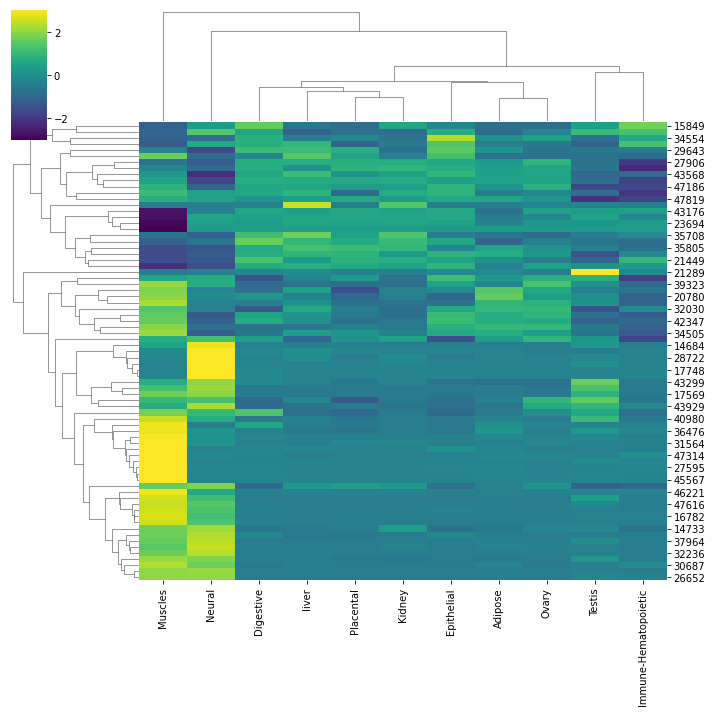

In [15]:
psi_tissue['std']=psi_tissue[tissues].std(axis = 1, skipna = True) 
psi_tissue['mean']=psi_tissue[tissues].mean(axis = 1, skipna = True) 
psi_var=psi_tissue[psi_tissue['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)
g.savefig("AS data/VastDB/Heatmap.pdf",format='pdf' )

In [16]:
tissue_interest='Muscles'
psi_tissue['Zscore']=(psi_tissue[tissue_interest] - psi_tissue['mean'])/psi_tissue['std']
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary,std,mean,Zscore
14460,HsaEX0000112,87.404,94.183333,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510,3.528340,95.253848,-2.224799
14475,HsaEX0000140,0.892,1.663333,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565,0.991271,2.025788,-1.143772
14476,HsaEX0000143,0.088,0.220000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130,1.415446,0.951636,-0.610151
14510,HsaEX0000234,82.186,86.530000,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490,8.251929,90.205091,-0.971784
14625,HsaEX0000543,0.480,1.356667,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330,5.819746,3.730758,-0.558574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.620000,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240,2.823207,95.978788,0.145654
50140,HsaEX0074521,0.942,0.570000,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200,1.511539,1.944576,-0.663282
50141,HsaEX0074523,99.246,100.000000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725,2.081487,98.692818,0.265763
50145,HsaEX0074528,59.932,40.966667,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620,12.949944,53.303970,0.511819


In [17]:
psi_filtred=psi_tissue[ psi_tissue['Zscore']>2]
len(psi_filtred)

107

In [18]:
psi_filtred=psi_filtred[  (psi_filtred['mean']>1) &   (psi_filtred['mean']<90) ]
psi_filtred=psi_filtred[  psi_filtred[tissue_interest]>15 ]
len(psi_filtred)

68

## Clustering and visualization

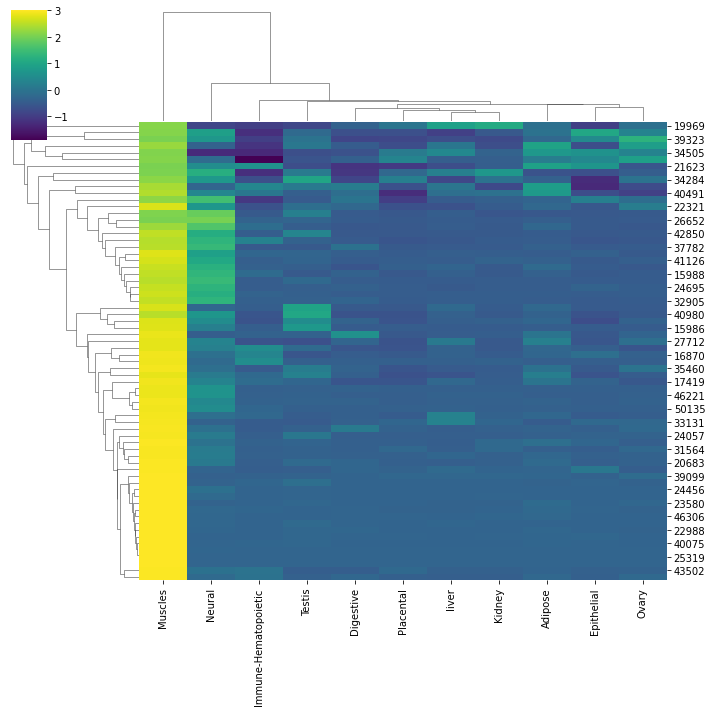

In [19]:
g = sns.clustermap(psi_filtred[tissues],cmap="viridis",z_score=0)


### Prepare the list of events in NEASE format

In [20]:
event_cord=pd.merge(annot,psi_filtred['EVENT'])    


In [21]:
event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
#event_cord=event_cord[['GENE','start','end']]

In [22]:
# convert gene names to gene IDs using nease functions
convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_on='Gene name')
input=input[['Gene stable ID','start','end']].drop_duplicates()
input.head(10)

,Gene stable ID,start,end
0,ENSG00000009307,114741527,114741673
107,ENSG00000068305,99703362,99703385
133,ENSG00000073921,85960675,85960777
196,ENSG00000074800,8870825,8870883
247,ENSG00000077549,19342752,19342864
282,ENSG00000079805,10803639,10803668
387,ENSG00000086598,123587611,123587631
398,ENSG00000087274,2909339,2909431
456,ENSG00000089597,62634310,62634375
526,ENSG00000107862,102354370,102354468


## NEASE analysis


In [23]:
# Run nease with standard input.
events=nease.run(input, organism='Human')


Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
14 protein domains are affected by AS.
9 of the affected domains have known interactions.
59 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [24]:
# Run on Reactome gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016'])
enr

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,trans-Golgi Network Vesicle Budding Homo sapiens R-HSA-199992,6/70,6.370770e-08,0.000010,0,0,34.506944,571.744197,CLTC;GBF1;AP3B1;SNX9;DNM2;PICALM
1,Reactome_2016,Clathrin derived vesicle budding Homo sapiens R-HSA-421837,6/70,6.370770e-08,0.000010,0,0,34.506944,571.744197,CLTC;GBF1;AP3B1;SNX9;DNM2;PICALM
2,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,10/420,4.426698e-07,0.000047,0,0,9.526829,139.381721,YWHAE;DCTN1;CLTC;GBF1;TMED2;AP3B1;SNX9;MIA3;DNM2;PICALM
3,Reactome_2016,Golgi Associated Vesicle Biogenesis Homo sapiens R-HSA-432722,5/54,5.790839e-07,0.000047,0,0,36.903525,530.001730,CLTC;AP3B1;SNX9;DNM2;PICALM
4,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,10/492,1.854257e-06,0.000121,0,0,8.073859,106.559004,YWHAE;DCTN1;CLTC;GBF1;TMED2;AP3B1;SNX9;MIA3;DNM2;PICALM
...,...,...,...,...,...,...,...,...,...,...
323,Reactome_2016,Gene Expression Homo sapiens R-HSA-74160,4/1631,7.318058e-01,0.738582,0,0,0.803978,0.251034,YWHAE;RANBP2;RPN2;MAPKAP1
322,Reactome_2016,Gastrin-CREB signalling pathway via PKC and MAPK Homo sapiens R-HSA-881907,1/432,7.307610e-01,0.738582,0,0,0.767195,0.240645,CAMK2G
324,Reactome_2016,Hemostasis Homo sapiens R-HSA-109582,1/552,8.139599e-01,0.818969,0,0,0.596419,0.122769,CAPZB
325,Reactome_2016,Signaling by GPCR Homo sapiens R-HSA-372790,2/1293,9.070039e-01,0.909786,0,0,0.498117,0.048620,ROCK2;CAMK2G


In [25]:
enr.to_csv("upregulated exons in muscle:gene-level enrichment.csv")

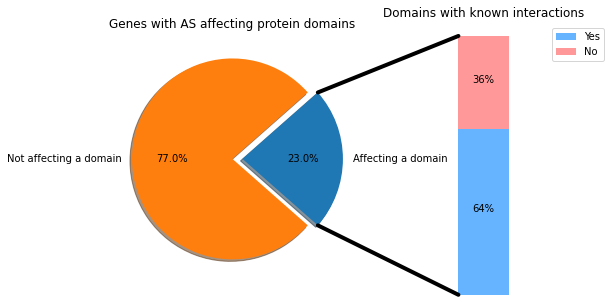

In [26]:
events.get_stats('AS data/VastDB/')


In [27]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains()

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Visualization link
0,ENO1,2023,ENSG00000074800,ENSE00003829707,PF03952,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003829707
1,DNM2,1785,ENSG00000079805,ENSE00002760163,PF01031,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002760163
2,TMED2,10959,ENSG00000086598,ENSE00002313457,PF01105,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002313457
3,HMGN3,9324,ENSG00000118418,ENSE00003723579,PF01101,-,False,
4,MACF1,23499,ENSG00000127603,ENSE00001458939,PF02187,-,False,
5,MACF1,643314,ENSG00000127603,ENSE00001458939,PF02187,-,False,
6,SLC37A4,2542,ENSG00000137700,ENSE00003518751,PF07690,-,False,
7,TPM1,7168,ENSG00000140416,ENSE00001141183,PF00261,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001141183
8,DST,667,ENSG00000151914,ENSE00001453630,PF02187,-,True,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001453630
9,PDLIM5,10611,ENSG00000163110,ENSE00002434903,PF15936,-,False,


In [28]:
print('number of exons', len(events.get_domains()['Exon stable ID'].unique()))


number of exons 13


In [29]:
events.get_edges()

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,TPM1,7168,-,PF00261,18,"MYH9,TPM2,ACTA2,MYH1,MYH6,ACTC1,MYH4,TNNT1,MYO19,TNNI1,MYH8,MYH7B,MYH2,TNNT2,TPM3,MYO18A,TPM4,TPM1","4627,7169,4619,59,4624,70,4622,7138,80179,7135,4626,57644,4620,7139,7170,399687,7171,7168"
1,DNM2,1785,-,PF01031,9,"CDK9,DDX39B,PLK1,PLEKHA4,DNM2,DNM1,H2AC4,DNM3,TIAM2","1025,7919,5347,57664,1785,1759,8335,26052,26230"
2,TMED2,10959,-,PF01105,8,"TMED10,TMED3,TMED7,TMED1,TMED9,TMED4,EIF3I,TMED5","50999,10972,51014,23423,54732,222068,8668,11018"
3,LIMS1,3987,-,PF00412,8,"EHMT2,BMP2K,STK11,ILK,TRIP6,DAPK1,PXN,LPXN","10919,55589,6794,3611,7205,1612,5829,9404"
4,CFLAR,8837,-,PF00656,7,"NOL3,NOD1,CASP10,CFLAR,CASP8,RIPK2,CASP3","8996,8767,843,8837,841,10392,836"
5,IMPDH2,3615,-,PF00478,4,"U2AF2,EIF4B,IMPDH2,IMPDH1","11338,1975,3614,3615"
6,ENO1,2023,-,PF03952,2,"ENO2,ENO3","2026,2027"
7,ASB8,140461,-,PF00023,2,"TUBB3,HIF1AN","10381,55662"
8,DST,667,-,PF02187,1,CALM1,801


### NEASE enrichment


In [30]:
nease_enr=events.enrich(database=['Reactome'])
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 4 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-397014,Muscle contraction,Reactome,"TPM1 (10), DST (1), LIMS1 (1)",1.648782e-12,1.495445e-09,16.663448
1,R-HSA-445355,Smooth Muscle Contraction,Reactome,"TPM1 (5), DST (1), LIMS1 (1)",6.950416e-09,4.202685e-06,14.130052
2,R-HSA-390522,Striated Muscle Contraction,Reactome,TPM1 (9),3.220897e-14,5.842708e-11,13.492023
3,R-HSA-5357769,Caspase activation via extrinsic apoptotic signalling pathway,Reactome,"LIMS1 (1), CFLAR (3)",1.664376e-04,6.038355e-02,5.343958
4,R-HSA-75158,TRAIL signaling,Reactome,CFLAR (3),9.669896e-05,4.385298e-02,4.014578
5,R-HSA-73817,Purine ribonucleoside monophosphate biosynthesis,Reactome,IMPDH2 (2),2.764999e-04,8.359513e-02,3.558305
6,R-HSA-8956320,Nucleobase biosynthesis,Reactome,IMPDH2 (2),3.741485e-04,9.695791e-02,3.426956
7,R-HSA-418889,Ligand-independent caspase activation via DCC,Reactome,"LIMS1 (1), CFLAR (1)",4.848090e-03,4.680993e-01,3.273097
8,R-HSA-6811434,COPI-dependent Golgi-to-ER retrograde traffic,Reactome,TMED2 (4),7.303322e-04,1.656028e-01,3.136480
9,R-HSA-177504,Retrograde neurotrophin signalling,Reactome,DNM2 (3),1.536433e-03,2.798156e-01,2.813486


In [31]:
nease_enr.to_csv("upregulated exons in muscle:NEASE enrichment.csv")

### Compare the classic gene enrichment with NEASE



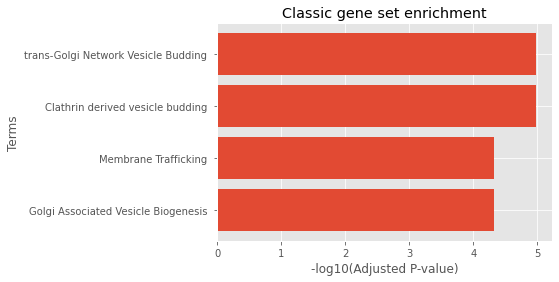

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:4]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/VastDB/classic_enr_muscle',format='pdf',bbox_inches='tight')





plt.show()

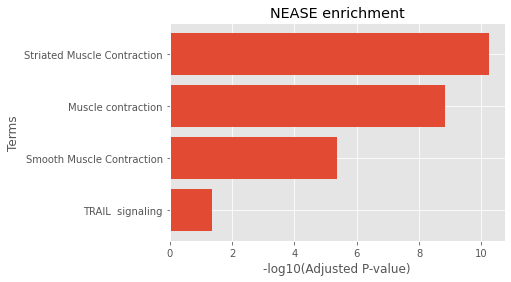

In [33]:
nease_enr=nease_enr.sort_values(by='adj p_value')
Term = nease_enr['Pathway name'][:4]
Pvalues =nease_enr['adj p_value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/VastDB/nease_enr_muscle',format='pdf',bbox_inches='tight')
plt.show()

### Pathway specific analysis

In [34]:
events.path_analysis('R-HSA-397014')

Enrichment of the pathway: Muscle contraction.

Overall p_value:  1.6487817249908125e-12




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,TPM1,7168,True,10/18,8.304262e-16,"TPM2,ACTA2,MYH6,TNNT1,TNNI1,MYH8,TNNT2,TPM3,TPM4,TPM1","7169,59,4624,7138,7135,4626,7139,7170,7171,7168"
1,DST,667,False,1/1,1.078773e-02,CALM1,801
2,LIMS1,3987,False,1/8,8.311539e-02,PXN,5829


In [35]:
events.Vis_path('R-HSA-445355',file='AS data/VastDB/')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  6.950416216098937e-09


Visualization of the pathway generated in: AS data/VastDB/Smooth Muscle Contraction.html
